In [1]:
# Import the module
import arcadia_pycolor as apc

In [2]:
# Direct access to a specific color.
# __repr__ method allows for display of the color in the terminal.
apc.aegean

   aegean #5088C5

In [3]:
# Displaying a Palette.
apc.palettes.primary

                        
   aegean    #5088C5
   amber     #F28360
   seaweed   #3B9886
   canary    #F7B846
   aster     #7A77AB
   rose      #F898AE
   vital     #73B5E3
   tangerine #FFB984
   lime      #97CD78
   dragon    #C85152
   oat       #F5E4BE
   wish      #BABEE0

In [4]:
# Displaying a Gradient.
apc.gradients.viridis

                     
   space  #282A49 0
   aegean #5088C5 0.468
   lime   #97CD78 0.746
   butter #FFFDBD 1

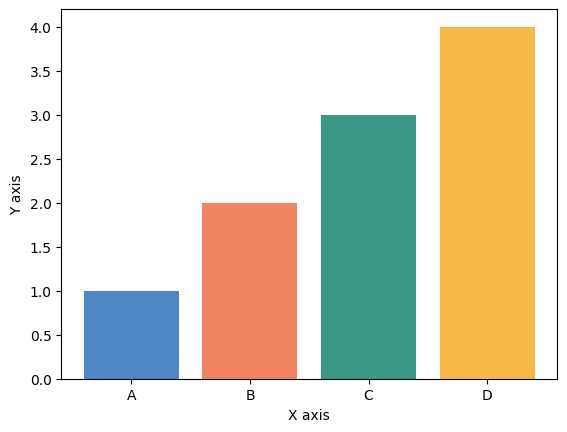

In [5]:
# Using colors in a matplotlib plot.
import matplotlib.pyplot as plt

plt.bar(
    x=["A", "B", "C", "D"],
    height=[1, 2, 3, 4],
    color=[apc.aegean, apc.amber, apc.seaweed, apc.canary],
)
plt.ylabel("Y axis")
plt.xlabel("X axis")
plt.show()

In [6]:
# Creating a Palette from a list of colors.
my_palette = apc.Palette("my_palette", [apc.aegean, apc.amber, apc.seaweed, apc.canary])

my_palette

        
   aegean  #5088C5
   amber   #F28360
   seaweed #3B9886
   canary  #F7B846

In [7]:
# Creating a Palette from a dictionary.
my_palette = apc.Palette.from_dict(
    "my_palette",
    {
        "red": "#FF0000",
        "green": "#00FF00",
        "blue": "#0000FF",
    },
)

my_palette

      
   red   #FF0000
   green #00FF00
   blue  #0000FF

In [8]:
# Creating a Gradient from a list of colors.
my_gradient = apc.Gradient("my_gradient", [apc.vital, apc.oat, apc.amber])

my_gradient

                     
   vital #73B5E3 0.0
   oat   #F5E4BE 0.5
   amber #F28360 1.0

In [9]:
# Creating a Gradient from a list of colors while specifying values.
my_gradient = apc.Gradient(
    "my_gradient",
    [apc.concord, apc.vital, apc.oat, apc.amber, apc.cinnabar],
    [0, 0.35, 0.5, 0.65, 1],
)

my_gradient

                     
   concord  #341E60 0
   vital    #73B5E3 0.35
   oat      #F5E4BE 0.5
   amber    #F28360 0.65
   cinnabar #9E3F41 1

In [10]:
# Creating a Gradient from a dictionary of colors.
my_gradient = apc.Gradient.from_dict(
    "my_gradient",
    {
        "red": "#FF0000",
        "grey": "#DDDDDD",
        "blue": "#0000FF",
    },
)

my_gradient

                     
   red  #FF0000 0.0
   grey #DDDDDD 0.5
   blue #0000FF 1.0

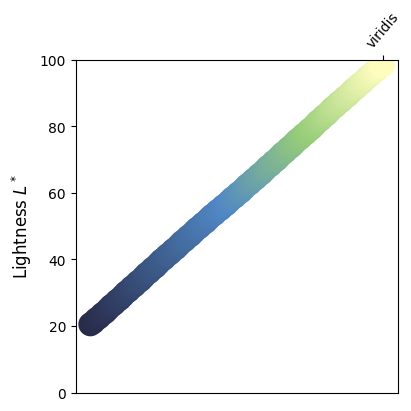

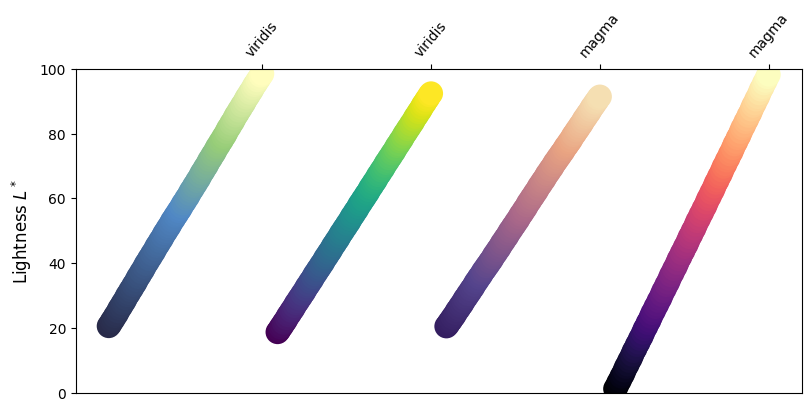

In [11]:
# Display the lightness of a Gradient.
apc.plot.plot_gradient_lightness(apc.gradients.viridis)
apc.plot.plot_gradient_lightness(
    [apc.gradients.viridis, "viridis", apc.gradients.magma, "magma"],
    figsize=(8, 4),
)

## Before `apc.mpl.setup()`

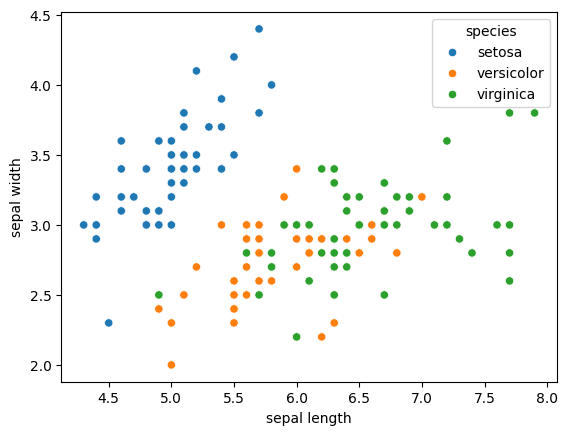

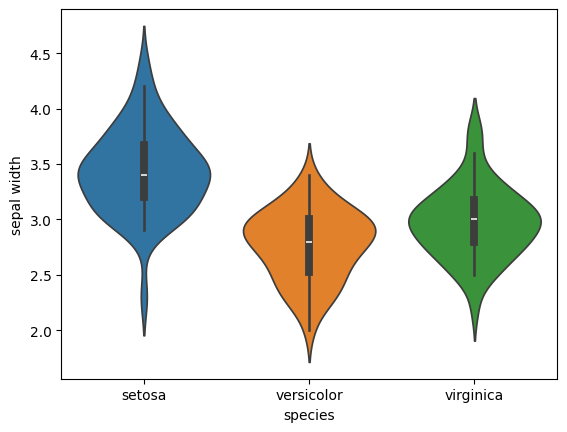

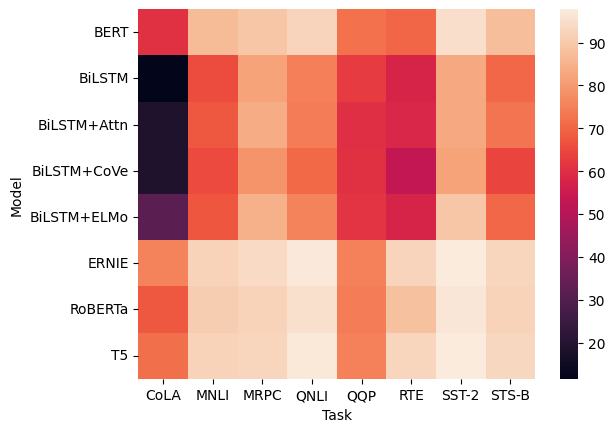

In [12]:
import pandas as pd
import seaborn as sns
from sklearn import datasets

# prepare dataset
iris = datasets.load_iris()
iris_data = pd.DataFrame(iris.data)
iris_data.columns = [i.replace(" (cm)", "") for i in iris.feature_names]
iris_data["species"] = iris.target_names[iris.target]
iris_data.head(5)

# plot
x_data = "sepal length"
y_data = "sepal width"
c_data = "species"

sns.scatterplot(x=x_data, y=y_data, hue="species", data=iris_data)
plt.show()

sns.violinplot(x=c_data, y=y_data, data=iris_data, hue=c_data)
plt.show()

glue = sns.load_dataset("glue").pivot(index="Model", columns="Task", values="Score")
sns.heatmap(glue)
plt.show()

## After `apc.mpl.setup()`
- Updates `plt.rcParams` for all downstream plots
- Sets display background to off-white
- Updates fonts to use `Suisse Int'l` if they're available on your machine
- Adjusts padding, line width, and other elements
- Removes top and right spines

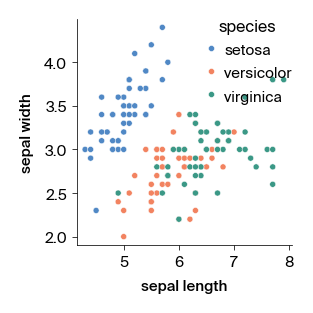

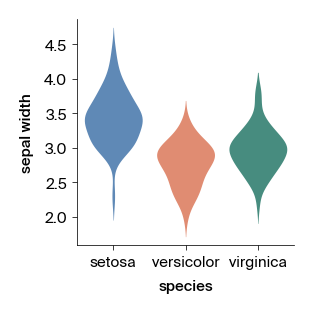

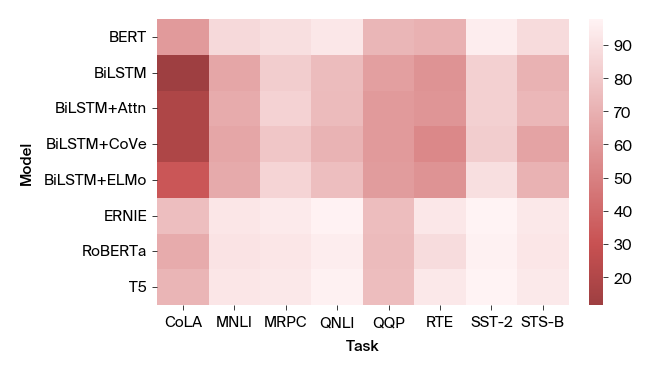

In [13]:
apc.mpl.setup()

colors = {
    "setosa": "apc:aegean",
    "versicolor": apc.amber,
    "virginica": apc.seaweed,
}

fig, ax = plt.subplots(figsize=apc.mpl.get_figure_dimensions("float_square"), layout="constrained")
sns.scatterplot(
    x=x_data,
    y=y_data,
    hue=c_data,
    data=iris_data,
    palette=colors,
    ax=ax,
)
apc.mpl.save_figure(fname="examples/scatter_setup.pdf")
plt.show()

fig, ax = plt.subplots(figsize=apc.mpl.get_figure_dimensions("float_square"), layout="constrained")
sns.violinplot(
    x=c_data,
    y=y_data,
    data=iris_data,
    hue=c_data,
    palette=colors,
    ax=ax,
)
apc.mpl.save_figure(fname="examples/violin_setup.pdf")
plt.show()

fig, ax = plt.subplots(figsize=apc.mpl.get_figure_dimensions("float_wide"), layout="constrained")
sns.heatmap(glue, ax=ax, cmap="apc:reds")
apc.mpl.save_figure(fname="examples/heatmap_setup.pdf")
plt.show()

## With `apc.mpl.autostyle()`
- Automatically capitalizes legend, axis titles
- Adds a horizontal line between legend title and entries
- Use `mono` argument to set font to monospace for a given axis
- Use `cat` argument to set axis to categorical, which capitalizes text, removes tickmarks, and adjusts padding
- Use `cbar` argument if a colorbar is present to monospace the ticks

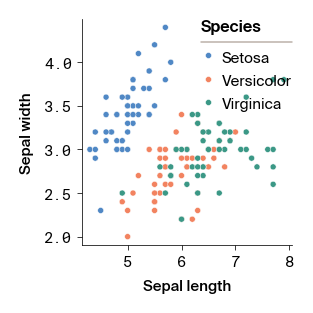

/Users/dennis/Code/arcadia-pycolor/arcadia_pycolor/mpl.py:116: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)  # type: ignore


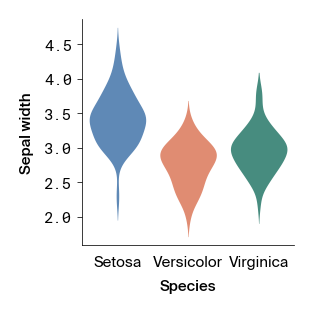

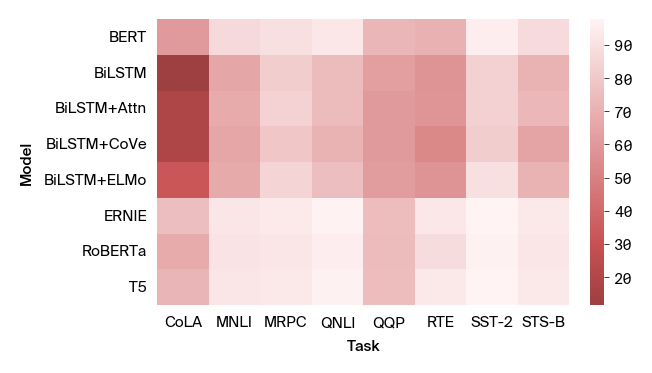

In [14]:
fig, ax = plt.subplots(figsize=apc.mpl.get_figure_dimensions("float_square"), layout="constrained")
sns.scatterplot(
    x=x_data,
    y=y_data,
    hue="species",
    data=iris_data,
    palette=colors,
    ax=ax,
)
apc.mpl.style_axis(monospaced_axes="both")

apc.mpl.save_figure(fname="examples/scatter_style_axis.pdf")

plt.show()

fig, ax = plt.subplots(figsize=apc.mpl.get_figure_dimensions("float_square"), layout="constrained")
sns.violinplot(
    x=c_data,
    y=y_data,
    data=iris_data,
    hue=c_data,
    palette=colors,
    ax=ax,
)
apc.mpl.style_axis(categorical_axes="x", monospaced_axes="y")
apc.mpl.save_figure(fname="examples/violin_style_axis.pdf")

plt.show()


fig, ax = plt.subplots(figsize=apc.mpl.get_figure_dimensions("float_wide"), layout="constrained")
sns.heatmap(glue, ax=ax, cmap="apc:reds")
apc.mpl.style_axis(colorbar_exists=True)
# Didn't use categorical_axes = "both" because it alters the ALLCAPS axis labels.

apc.mpl.set_xaxis_categorical()
apc.mpl.set_yaxis_categorical()

apc.mpl.save_figure(fname="examples/heatmap_style_axis.pdf")
plt.show()

## Granular breakdown of the `apc.mpl` module

In [15]:
# Runs all of the load methods below.
apc.mpl.setup()

# Loads the fonts into matplotlib by detecting the available Suisse fonts.
# Users will need to install the Suisse fonts to use them.
# This currently only supports macOS.
# apc.mpl.load_fonts()

# Adds Arcadia's colors to the matplotlib color library with prefix "apc:"
# apc.mpl.load_colors()

# Adds Arcadia's gradients and palettes to the matplotlib color library with prefix "apc:"
# apc.mpl.load_colormaps()

# Updates matplotlib rcContext with Arcadia's styles.
# apc.mpl.load_styles()

## Declarative utilities of `apc.mpl`
These are wrappers for `matplotlib` functions that:
1) Have a "declarative" API similar to `matplotlib`'s `set_xlabel`, `set_xticks`, etc.
1) Detect the current axis using `plt.gca()`, if one is not provided
2) Use `matplotlib`-native functions to achieve the desired effect

/Users/dennis/Code/arcadia-pycolor/arcadia_pycolor/mpl.py:116: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)  # type: ignore
/Users/dennis/Code/arcadia-pycolor/arcadia_pycolor/mpl.py:124: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(yticklabels)  # type: ignore


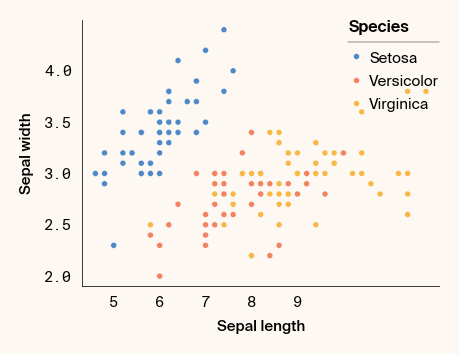

In [16]:
import matplotlib as mpl

with mpl.rc_context({"figure.facecolor": apc.parchment}):
    sns.scatterplot(x=x_data, y=y_data, hue="species", data=iris_data)

# Capitalize the axis labels.
apc.mpl.capitalize_xlabel()
apc.mpl.capitalize_ylabel()

# Do both with:
apc.mpl.capitalize_axislabels()


# Capitalize axis tick labels.
apc.mpl.capitalize_xticklabels()
apc.mpl.capitalize_yticklabels()

# Do both with:
apc.mpl.capitalize_ticklabels()


leg = plt.gca().get_legend()

# Capitalize legend title.
apc.mpl.capitalize_legend_title(legend=leg)

# Capitalize legend entry names.
apc.mpl.capitalize_legend_entries(legend=leg)

# Capitalize all legend text.
apc.mpl.capitalize_legend_text(legend=leg)

# Add horizontal line between legend title and entries.
apc.mpl.add_legend_line(legend=leg)

# Left-justify legend entries and set title to Suisse Int'l Semibold.
apc.mpl.justify_legend_text(legend=leg)

# Do all with:
apc.mpl.style_legend(legend=leg)


# Change the font of the axis labels to monospace (for numerical axes).
apc.mpl.set_xticklabel_monospaced()
apc.mpl.set_yticklabel_monospaced()

# Do both with:
apc.mpl.set_ticklabel_monospaced()


# Remove ticks and adjust padding for categorical axes.
apc.mpl.set_yaxis_categorical()
apc.mpl.set_xaxis_categorical()

# Do both with:
apc.mpl.set_axes_categorical()


# If there's a colorbar, monospace the tick labels.
apc.mpl.set_colorbar_ticklabel_monospaced()  # type: ignore

## Sizing styles

The `apc.mpl.dimensions()` function allows you to choose from a fixed set of plot sizes, which match existing Illustrator templates.

When generated with `layout="constrained"` and saved using `apc.mpl.SAVE_WEB` parameters, the resulting PDF images should drag and drop perfectly into place with the Illustrator templates.

There are three size categories, based on the Illustrator templates:
- `"full"` (1500px wide)
- `"threeq"`, or three-quarters (1050px wide)
- `"half"`, or half-page (750px wide)

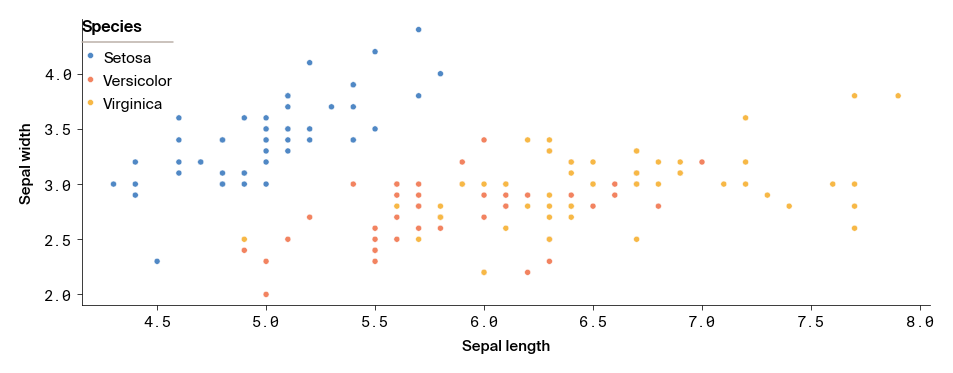

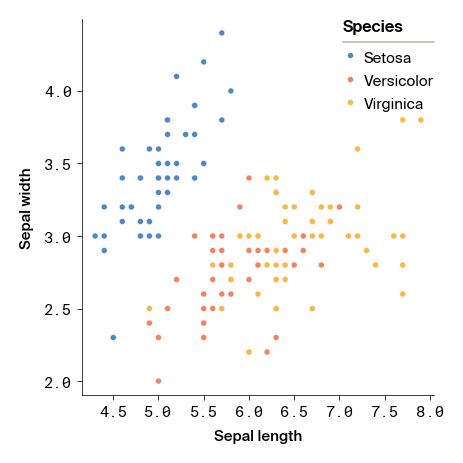

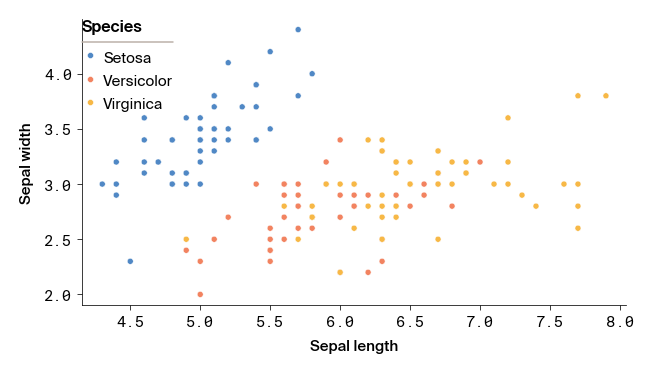

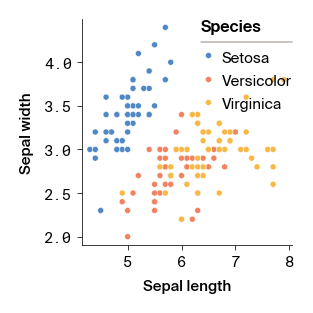

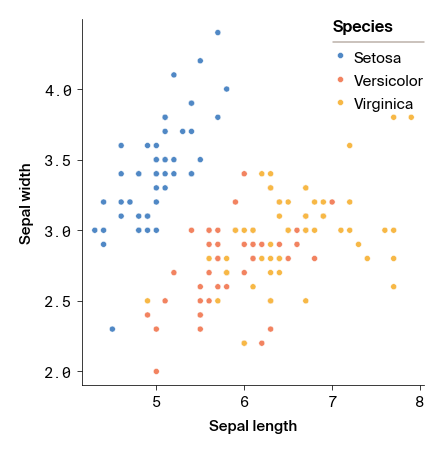

In [17]:
fig, ax = plt.subplots(figsize=apc.mpl.get_figure_dimensions("full_wide"), layout="constrained")
sns.scatterplot(x=x_data, y=y_data, hue="species", data=iris_data, ax=ax)
apc.mpl.style_axis(monospaced_axes="both")
apc.mpl.save_figure(fname="examples/scatter_full_wide.pdf")  # type: ignore
plt.show()

fig, ax = plt.subplots(figsize=apc.mpl.get_figure_dimensions("full_square"), layout="constrained")
sns.scatterplot(x=x_data, y=y_data, hue="species", data=iris_data, ax=ax)
apc.mpl.style_axis(monospaced_axes="both")
apc.mpl.save_figure(fname="examples/scatter_full_square.pdf")  # type: ignore
plt.show()

fig, ax = plt.subplots(figsize=apc.mpl.get_figure_dimensions("float_wide"), layout="constrained")
sns.scatterplot(x=x_data, y=y_data, hue="species", data=iris_data, ax=ax)
apc.mpl.style_axis(monospaced_axes="both")
apc.mpl.save_figure(fname="examples/scatter_float_wide.pdf")  # type: ignore
plt.show()

fig, ax = plt.subplots(figsize=apc.mpl.get_figure_dimensions("float_square"), layout="constrained")
sns.scatterplot(x=x_data, y=y_data, hue="species", data=iris_data, ax=ax)
apc.mpl.style_axis(monospaced_axes="both")
apc.mpl.save_figure(fname="examples/scatter_float_square.pdf")  # type: ignore
plt.show()

fig, ax = plt.subplots(figsize=apc.mpl.get_figure_dimensions("half_square"), layout="constrained")
sns.scatterplot(x=x_data, y=y_data, hue="species", data=iris_data, ax=ax)
apc.mpl.style_axis(monospaced_axes="both")
apc.mpl.save_figure(fname="examples/scatter_half_square.pdf")  # type: ignore
plt.show()

In [18]:
print(apc.gradients.viridis)
print(apc.gradients.viridis.reverse())

                     
   space  #282A49 0
   aegean #5088C5 0.468
   lime   #97CD78 0.746
   butter #FFFDBD 1
                     
   butter #FFFDBD 0
   lime   #97CD78 0.254
   aegean #5088C5 0.532
   space  #282A49 1


In [19]:
apc.gradients.viridis.resample_as_palette(6)

            
   viridis_0 #282a49
   viridis_1 #39527e
   viridis_2 #4a7ab3
   viridis_3 #72a9a0
   viridis_4 #add787
   viridis_5 #fffdbd

In [20]:
apc.cvd.display_all_color(apc.aegean)

   aegean #5088C5
   aegean_d #5e80c4
   aegean_p #6e8bc8
   aegean_t #00969e


In [21]:
apc.cvd.simulate_palette(apc.palettes.primary, "t")

                        
   aegean_t    #00969e
   amber_t     #ff6e7b
   seaweed_t   #009a93
   canary_t    #ffa6a1
   aster_t     #6e808a
   rose_t      #ff90a0
   vital_t     #2ec0c4
   tangerine_t #ffabac
   lime_t      #97c7b9
   dragon_t    #da3753
   oat_t       #feddda
   wish_t      #b2c4c9

In [22]:
apc.cvd.display_all_palette(apc.palettes.primary_ordered)

PrimaryOrdered
                        
PrimaryOrdered_d
                        
PrimaryOrdered_p
                        
PrimaryOrdered_t
                        


In [23]:
apc.cvd.display_all_gradient(apc.gradients.viridis)

viridis
                     
viridis_d
                     
viridis_p
                     
viridis_t
                     


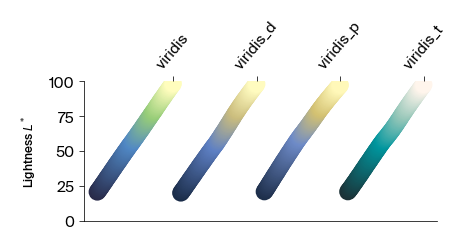

In [24]:
apc.cvd.display_all_gradient_lightness(apc.gradients.viridis, figsize=(6, 3))

In [25]:
apc.plot.display_all_palettes()

Primary
                        
Secondary
                
Neutral
                
Background
        
PrimaryOrdered
                        
SecondaryOrdered
                
AllOrdered
                                        
BlueShades
          
RedShades
          
YellowShades
          
PurpleShades
          
TealShades
          
PinkShades
          
BrownShades
          
GreyShades
          
GreenShades
          
Other
                                      
Named
                
All
                                                                                                                                                                      


In [26]:
apc.plot.display_all_gradients()

magma
                     
viridis
                     
verde
                     
sunset
                     
wine
                     
lisafrank
                     
reds
                     
oranges
                     
greens
                     
sages
                     
blues
                     
purples
                     
orange_sage
                     
red_blue
                     
purple_green
                     


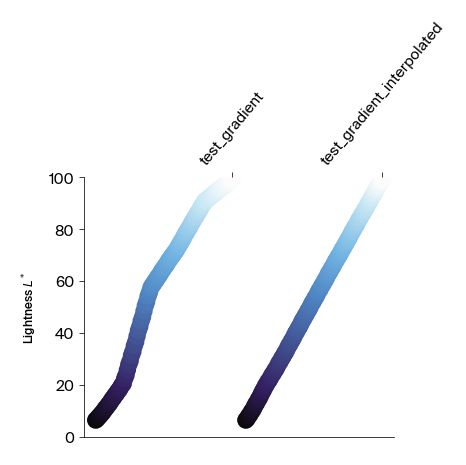

In [27]:
grad = apc.Gradient(
    "test_gradient",
    [apc.pitch, apc.concord, apc.aegean, apc.vital, apc.sky, apc.paper],
)
interpolated_grad = grad.interpolate_lightness()

apc.plot.plot_gradient_lightness([grad, interpolated_grad], figsize=(6, 6))

In [28]:
apc.gradients.reds + apc.gradients.blues.reverse()

                     
   cinnabar #9E3F41 0.0
   dragon   #C85152 0.106
   blush    #FFF3F4 0.5
   zephyr   #F4FBFF 0.5
   aegean   #5088C5 0.873
   lapis    #2B65A1 1.0

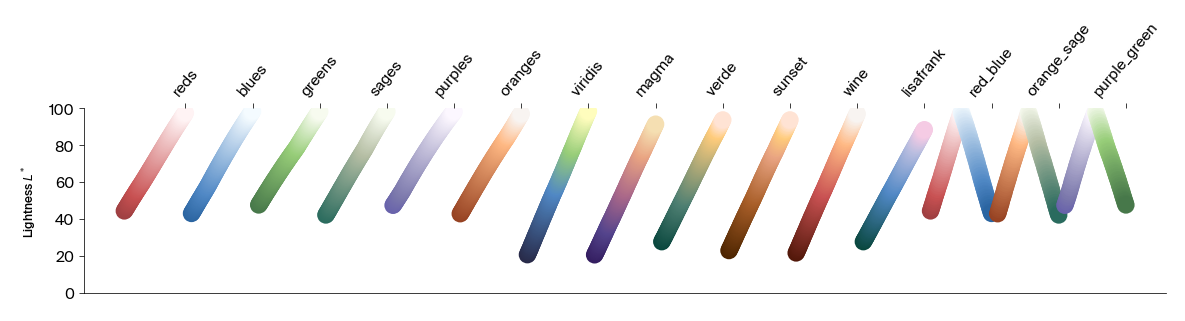

In [29]:
figure = apc.plot.plot_gradient_lightness(
    [
        apc.gradients.reds,
        apc.gradients.blues,
        apc.gradients.greens,
        apc.gradients.sages,
        apc.gradients.purples,
        apc.gradients.oranges,
        apc.gradients.viridis,
        apc.gradients.magma,
        apc.gradients.verde,
        apc.gradients.sunset,
        apc.gradients.wine,
        apc.gradients.lisafrank,
        apc.gradients.red_blue,
        apc.gradients.orange_sage,
        apc.gradients.purple_green,
    ],
    figsize=(16, 4),
    return_fig=True,
)

plt.savefig("examples/gradient_lightness.pdf")